In [1]:
import pandas as pd
import numpy as np
import html5lib
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
school = pd.read_csv('https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Treasury-Elements.csv')

In [4]:
school.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'COUNT_ED', 'AGEGE24',
       'PCT_WHITE', 'PCT_BLACK', 'PCT_ASIAN', 'PCT_HISPANIC', 'PCT_BA',
       'PCT_GRAD_PROF', 'PCT_BORN_US', 'MEDIAN_HH_INC', 'POVERTY_RATE',
       'UNEMP_RATE', 'LN_MEDIAN_HH_INC', 'COUNT_NWNE_P10', 'COUNT_WNE_P10',
       'MN_EARN_WNE_P10', 'MD_EARN_WNE_P10', 'PCT10_EARN_WNE_P10',
       'PCT25_EARN_WNE_P10', 'PCT75_EARN_WNE_P10', 'PCT90_EARN_WNE_P10',
       'SD_EARN_WNE_P10', 'COUNT_WNE_INC1_P10', 'COUNT_WNE_INC2_P10',
       'COUNT_WNE_INC3_P10', 'COUNT_WNE_INDEP0_INC1_P10',
       'COUNT_WNE_INDEP0_P10', 'COUNT_WNE_INDEP1_P10', 'COUNT_WNE_MALE0_P10',
       'COUNT_WNE_MALE1_P10', 'GT_25K_P10', 'MN_EARN_WNE_INC1_P10',
       'MN_EARN_WNE_INC2_P10', 'MN_EARN_WNE_INC3_P10',
       'MN_EARN_WNE_INDEP0_INC1_P10', 'MN_EARN_WNE_INDEP0_P10',
       'MN_EARN_WNE_INDEP1_P10', 'MN_EARN_WNE_MALE0_P10',
       'MN_EARN_WNE_MALE1_P10', 'COUNT_NWNE_P6', 'COUNT_WNE_P6',
       'MN_EARN_WNE_P6', 'MD_EARN_WNE_P6', 'PCT10_EARN_

In [6]:
school[school['INSTNM'].str.contains('Minnesota') == True]

UNITID            16
OPEID             16
OPEID6            16
INSTNM            16
COUNT_ED           0
                  ..
SD_EARN_WNE_P9    15
GT_25K_P9         15
GT_28K_P10        16
GT_28K_P8         16
GT_28K_P6         16
Length: 92, dtype: int64

In [7]:
school_column_desc = pd.read_csv('CollegeScorecardDataDictionary_Fields.csv')
school_column_desc.head()

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,VARIABLE NAME,VALUE,LABEL,SOURCE,NOTES
0,Unit ID for institution,root,id,integer,UNITID,NaN,NaN,IPEDS,NaN
1,8-digit OPE ID for institution,root,ope8_id,integer,OPEID,NaN,NaN,IPEDS,NaN
2,6-digit OPE ID for institution,root,ope6_id,integer,OPEID6,NaN,NaN,IPEDS,NaN
3,Institution name,school,name,autocomplete,INSTNM,NaN,NaN,IPEDS,NaN
4,City,school,city,autocomplete,CITY,NaN,NaN,IPEDS,NaN


In [8]:
school_data_dictionary = pd.merge(pd.DataFrame(school.columns, columns = ['VARIABLE NAME']), school_column_desc, on = 'VARIABLE NAME')[['VARIABLE NAME','NAME OF DATA ELEMENT','API data type']]

In [9]:
school_data_dictionary.to_csv('school_data_dictionary.csv')

In [10]:
school_data_dictionary.head()

,VARIABLE NAME,NAME OF DATA ELEMENT,API data type
0,UNITID,Unit ID for institution,integer
1,OPEID,8-digit OPE ID for institution,integer
2,OPEID6,6-digit OPE ID for institution,integer
3,INSTNM,Institution name,autocomplete
4,COUNT_ED,Count of students in the earnings cohort,integer


In [11]:
pd.to_numeric(school.MN_EARN_WNE_P6, errors ='coerce').dropna().count()

5358

In [12]:
pd.to_numeric(school.MN_EARN_WNE_P7,errors = 'coerce').dropna().count()

4781

In [13]:
pd.to_numeric(school.MN_EARN_WNE_P8, errors = 'coerce').dropna().count()

5235

In [14]:
pd.to_numeric(school.MN_EARN_WNE_P9, errors = 'coerce').dropna().count()

4624

In [15]:
pd.to_numeric(school.MN_EARN_WNE_P10, errors = 'coerce').dropna().count()

5175

In [16]:
school.head()

,UNITID,OPEID,OPEID6,INSTNM,COUNT_ED,AGEGE24,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,...,SD_EARN_WNE_P8,GT_25K_P8,COUNT_NWNE_P9,COUNT_WNE_P9,MN_EARN_WNE_P9,SD_EARN_WNE_P9,GT_25K_P9,GT_28K_P10,GT_28K_P8,GT_28K_P6
0,100654,100200,1002,Alabama A & M University,NaN,0.07999999821186,46.8400001525878,47.9799995422363,1.48000001907348,3.78999996185302,...,20100,0.544,215,1480,33800,27500,0.58783781528472,0.567,0.483,0.431
1,100663,105200,1052,University of Alabama at Birmingham,NaN,0.25999999046325,69.0199966430664,27.7600002288818,1.10000002384185,2.02999997138977,...,36500,0.722,347,2592,44500,38600,0.73726850748062,0.726,0.686,0.631
2,100690,2503400,25034,Amridge University,NaN,0.82999998331069,70.8799972534179,22.5300006866455,1.28999996185302,6.94000005722046,...,33900,0.668,41,174,42400,30500,0.7356321811676,0.7,0.631,0.542
3,100706,105500,1055,University of Alabama in Huntsville,NaN,0.28999999165534,76.3799972534179,18.9799995422363,1.41999995708465,2.54999995231628,...,28400,0.73,152,1106,50200,37700,0.78119349479675,0.755,0.71,0.649
4,100724,100500,1005,Alabama State University,NaN,0.10999999940395,42.6899986267089,52.3199996948242,1.40999996662139,4.09000015258789,...,18000,0.468,297,1810,29400,20000,0.52983427047729,0.494,0.436,0.351


In [17]:
school.MN_EARN_WNE_P6 = pd.to_numeric(school.MN_EARN_WNE_P6, errors = 'coerce')
school.AGEGE24 = pd.to_numeric(school.AGEGE24, errors = 'coerce')
school_data = school[['INSTNM','AGEGE24','MN_EARN_WNE_P6']]
school_data_nona = school_data.dropna()
school_data_nona.head(20)

,INSTNM,AGEGE24,MN_EARN_WNE_P6
0,Alabama A & M University,0.08,28400.0
1,University of Alabama at Birmingham,0.26,39400.0
2,Amridge University,0.83,35400.0
3,University of Alabama in Huntsville,0.29,40300.0
4,Alabama State University,0.11,24400.0
5,The University of Alabama,0.10,42400.0
6,Central Alabama Community College,0.42,25900.0
7,Athens State University,0.61,36200.0
8,Auburn University at Montgomery,0.32,32100.0
9,Auburn University,0.07,43100.0


AttributeError: 'DataFrame' object has no attribute 'sort'

In [21]:
school_data_nona.MN_EARN_WNE_P6.mean()

32092.39299179419

In [22]:
school_data_nona.MN_EARN_WNE_P6.max()

151500.0

In [23]:
school_data_nona.MN_EARN_WNE_P6.min()

11800.0

In [25]:
mean_earn = school_data.MN_EARN_WNE_P6.mean(skipna=True)
median_earn = school_data.MN_EARN_WNE_P6.median(skipna=True)
median_earn

29600.0

In [26]:
school_data.MN_EARN_WNE_P6.fillna(school_data.MN_EARN_WNE_P6.median(skipna=True)).mean()

31112.275028121483

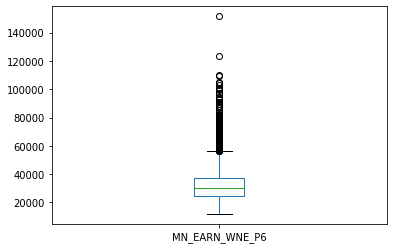

In [27]:
school_data_nona.MN_EARN_WNE_P6.plot.box()

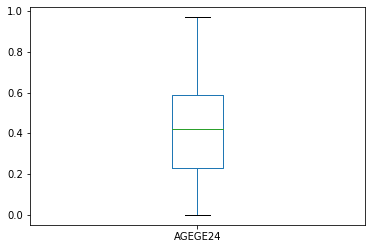

In [28]:
school_data_nona.AGEGE24.plot.box()

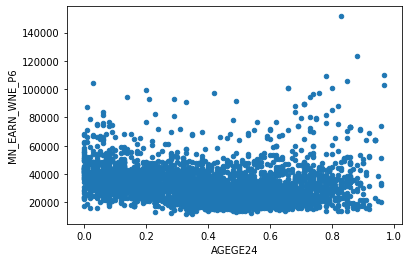

In [29]:
school_data_nona.plot.scatter(x='AGEGE24',y='MN_EARN_WNE_P6')

In [30]:
school_data_nona.AGEGE24[school_data_nona.AGEGE24 == 0.0].index.size

48

In [31]:
mask = np.random.rand(len(school_data_nona)) < 0.7
train = school_data_nona[mask]
test = school_data_nona[~mask]

In [32]:
from sklearn.linear_model import LinearRegression
x_train = train[['AGEGE24']]
y_train = train['MN_EARN_WNE_P6']
model = LinearRegression().fit(x_train, y_train)

In [34]:
x_test = test[['AGEGE24']]
y_test = test['MN_EARN_WNE_P6']
predicted = model.predict(x_test)
model.score(x_test, y_test)

0.04395598569754078

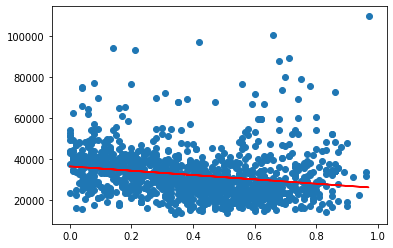

In [35]:
from matplotlib import pyplot as plt
plt.scatter(test[['AGEGE24']], test['MN_EARN_WNE_P6'])
plt.plot(test[['AGEGE24']], predicted, color='red')